<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

With many colleges cutting standardized tests from their applications <sup>[1](#footnote1)</sup> , the question of the efficacy and necessity of these tests such as the ACT have come into question again. While the creators, ACT Inc., have claimed that these tests are a measure of college preparedness, many others claim that they are far more indicitave of other factors beyond college prepardness<sup>[2](#footnote2)</sup> such as socioeconomic status<sup>[3](#footnote3)</sup>, school district quality, and more. 

How are students from districts or schools with lesser income, faculty, and school resources being impacted when it comes to standardized tests like the ACT?

Citations:

<a name="myfootnote1">1</a>: https://www.nytimes.com/article/sat-act-test-optional-colleges-coronavirus.html

<a name="myfootnote2">2</a>: https://www.ascd.org/el/articles/why-standardized-tests-dont-measure-educational-quality

<a name="myfootnote3">3</a>: https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Data

* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`gdp_and_income_ca.csv`](./data/gdp_and_income_ca.csv): California Income Data by County
* [`currentexpenses1920.xlsx`](./data/currentexpense1920.xlsx): School Expenses Relative to Average Daily Attendence (ADA)
* [`teacher_salary_ca_2019.xlsx`](./data/teacher_salary_ca_2019.xlsx): Teacher Employment Information


*All libraries used should be added here*

In [27]:
# Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Import and Cleaning

In [28]:
#importing all datasets to check what we have

final = pd.read_csv('../data/processed/final.csv')

# Cleaning

Refer to

* [`cleaning_and_merging.ipynb`](cleaning_and_merging.ipynb): Cleaning and Merging necessary to create proccessed data that the analysis will use

Output:
* [`final.csv`](./data/processed/final.csv): Teacher Employment Information

### Data Dictionary

| Field                    	| Description                                    	| Data Type 	|
|--------------------------	|------------------------------------------------	|-----------	|
| num_over_21_score        	| Number of Test Takers that Scored Over 21      	| int64     	|
| percent_over_21_Score    	| Percent of Test Takers that Scored Over 21     	| float64   	|
| per_capita_income        	| Income Per Capita by County                    	| float64   	|
| edp_365                  	| Total School Expenses                          	| float64   	|
| current_expenses_ada     	| Average Daily Attendence with Current Expenses 	| float64   	|
| current_expenses_per_ada 	| Expenses per Average Daily Attendence          	| float64   	|
| teachers                 	| Number of Teachers for 2018-2019               	| float64   	|
| avg_teacher_salary_18_19 	| Average Teacher Salary for 2018-2019           	| float64   	|


**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Exploratory Data Analysis

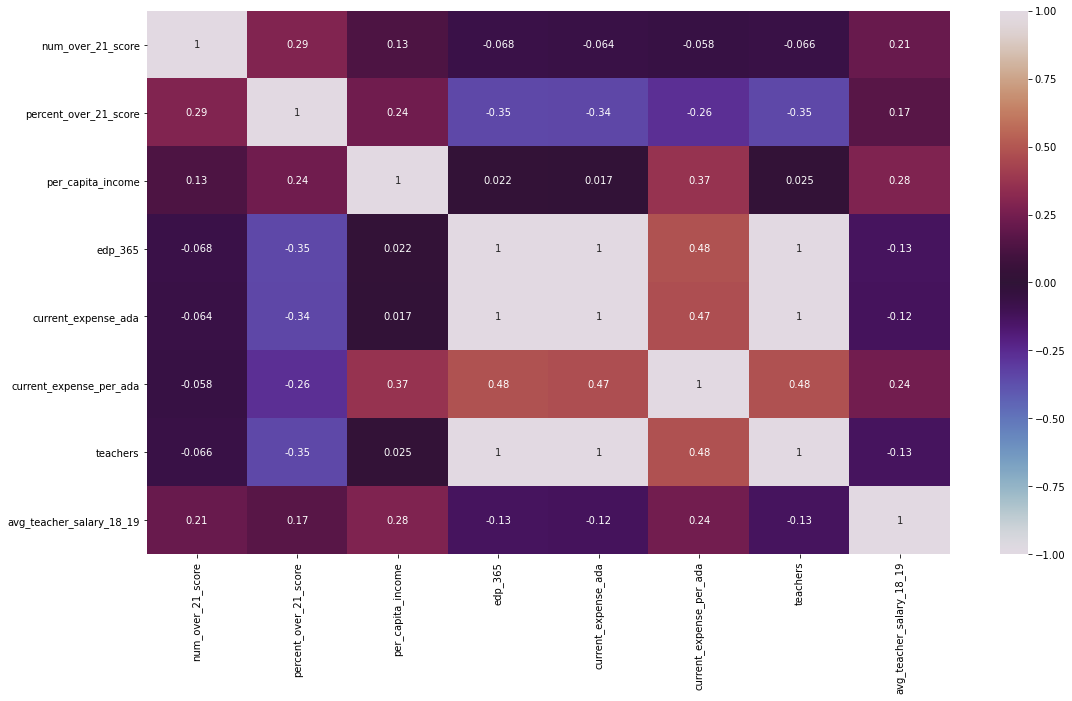

In [29]:
plt.figure(figsize = (18,10))

sns.heatmap(final[['num_over_21_score','percent_over_21_score','per_capita_income','edp_365','current_expense_ada','current_expense_per_ada','teachers','avg_teacher_salary_18_19']].corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    cmap = 'twilight'
       );

plt.savefig('../figures/variable_heatmaps')
           

Points of interest lie in the relationship between percent_over_21_score and District Expenditures in the form of EDP_365, current_expense_ada, and current_expense_per_ada having strong negative correlations with act test scores.

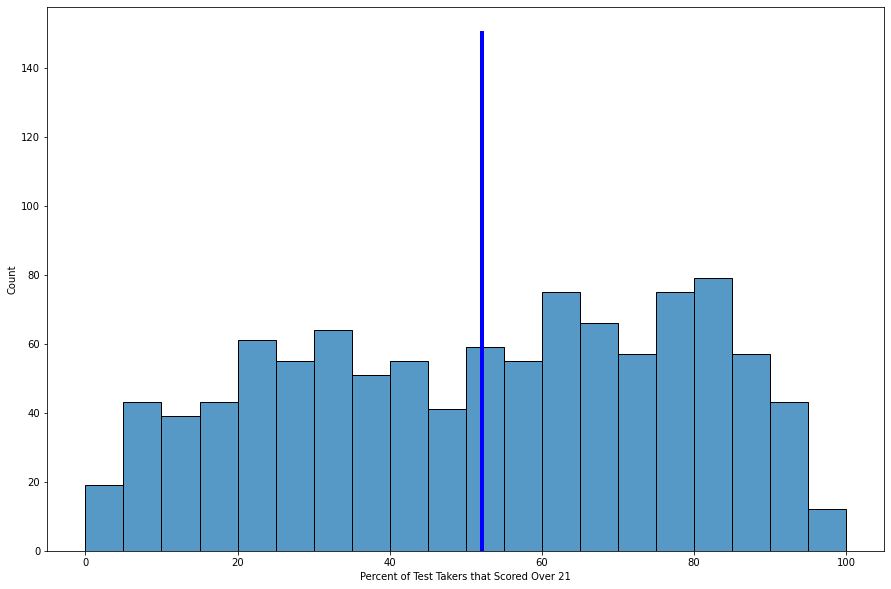

In [30]:
plt.figure(figsize=(15,10))

sns.histplot(final['percent_over_21_score'],
            bins = 20);

plt.plot([final['percent_over_21_score'].mean(), final['percent_over_21_score'].mean()], [0,150], 
         linewidth=4,
        color='blue');

plt.xlabel('Percent of Test Takers that Scored Over 21');

plt.savefig('../figures/percent_over_21_hist')
           


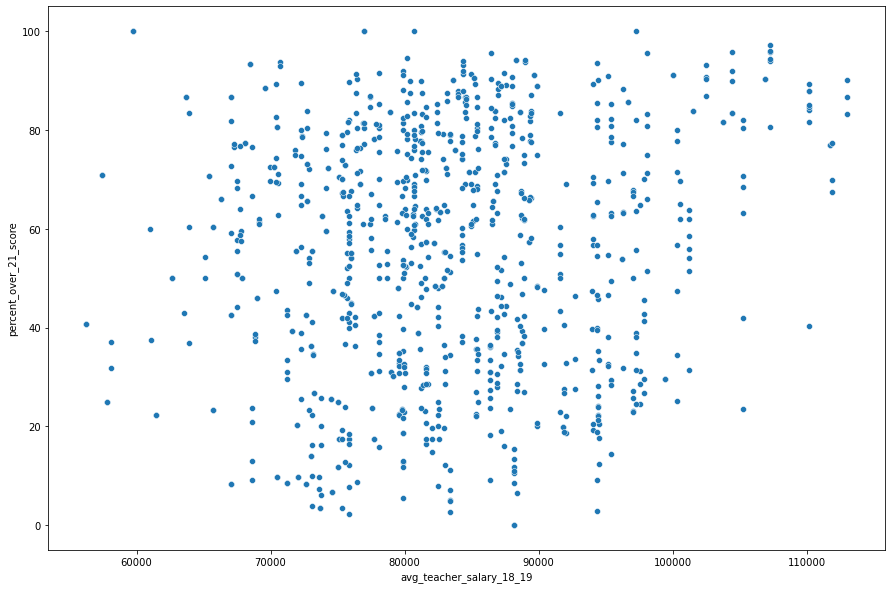

In [22]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=final['avg_teacher_salary_18_19'],
               y=final['percent_over_21_score']);

plt.savefig('../figures/avg_teacher_salary_scatter')
           

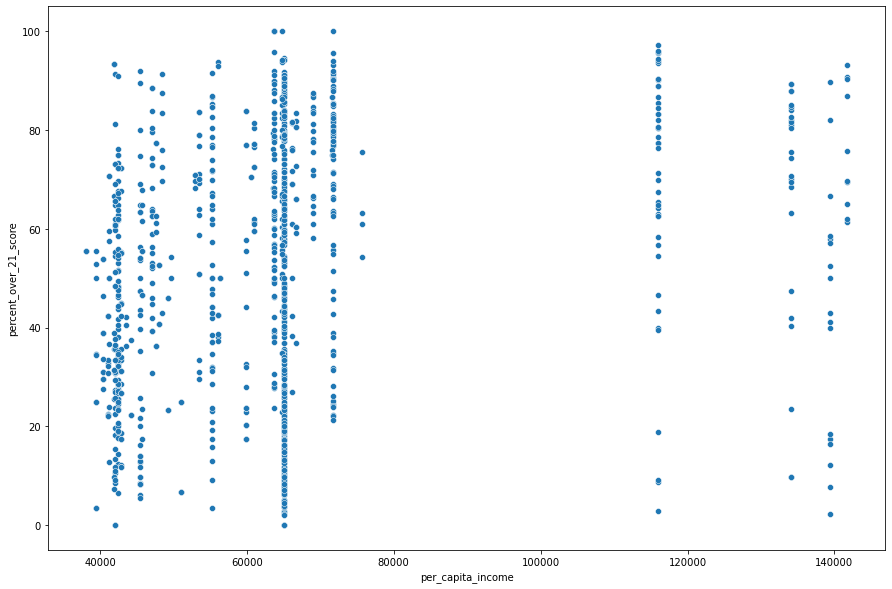

In [11]:
plt.figure(figsize = (15,10));
sns.scatterplot(
    x = final['per_capita_income'],
    y = final['percent_over_21_score']);

plt.savefig('../figures/per_capita_income_scatter')

While there is a noticeable correlation coefficient, the per capita income data is at a county rate, far too generalized to drag significant conclusions. 

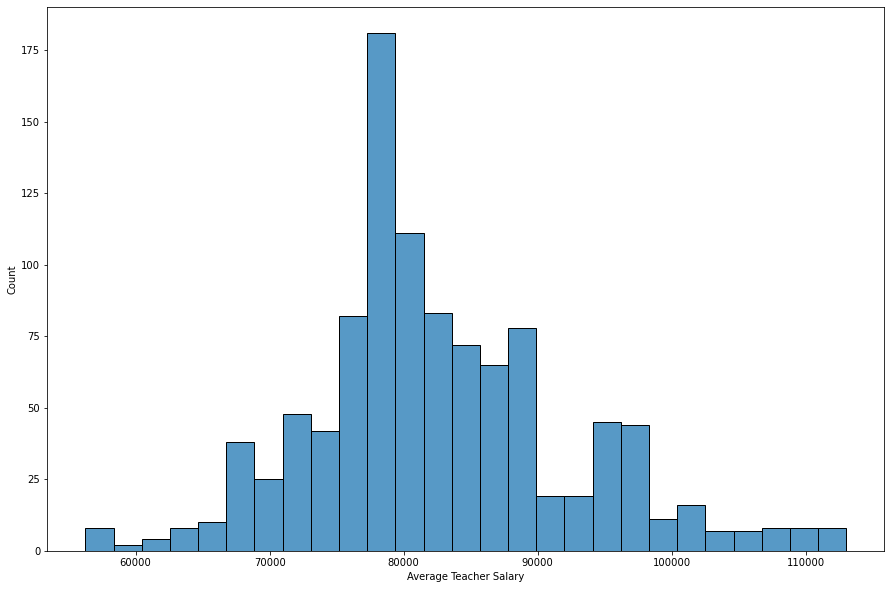

In [12]:
plt.figure(figsize=(15,10))

sns.histplot(final['avg_teacher_salary_18_19']);

plt.xlabel('Average Teacher Salary')

plt.savefig('../figures/avg_teacher_salary_hist')


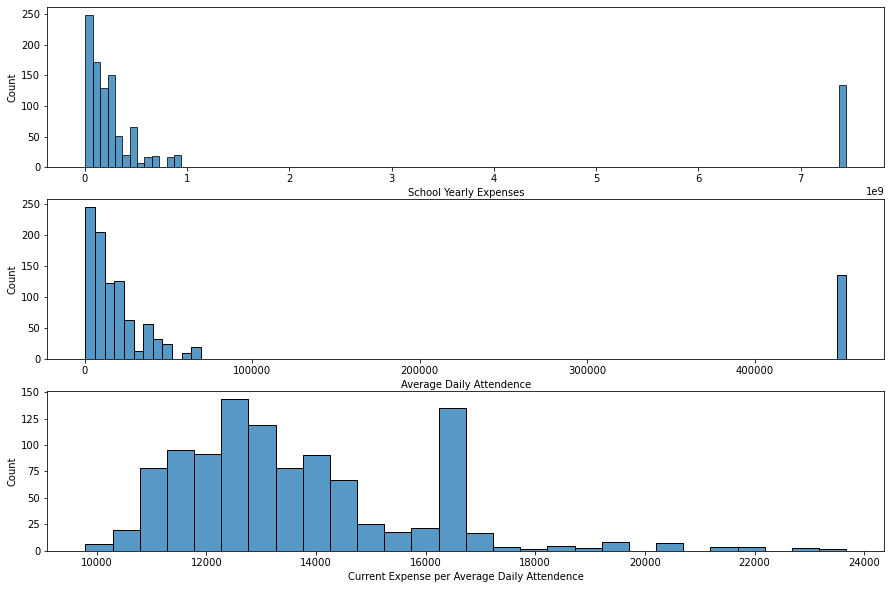

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(x = final['edp_365'])

plt.xlabel('School Yearly Expenses')

plt.subplot(3,1,2)
sns.histplot(x = final['current_expense_ada'])

plt.xlabel('Average Daily Attendence')

plt.subplot(3,1,3)
sns.histplot(x = final['current_expense_per_ada'])

plt.xlabel('Current Expense per Average Daily Attendence')

plt.savefig('../figures/ada_histograms')
           


There is a noticeable outlier of schools that differ strongly from the majority in expenses and average daily attendence (ADA)

In [14]:
ada_outliers = final[final['current_expense_ada'] > 200000]

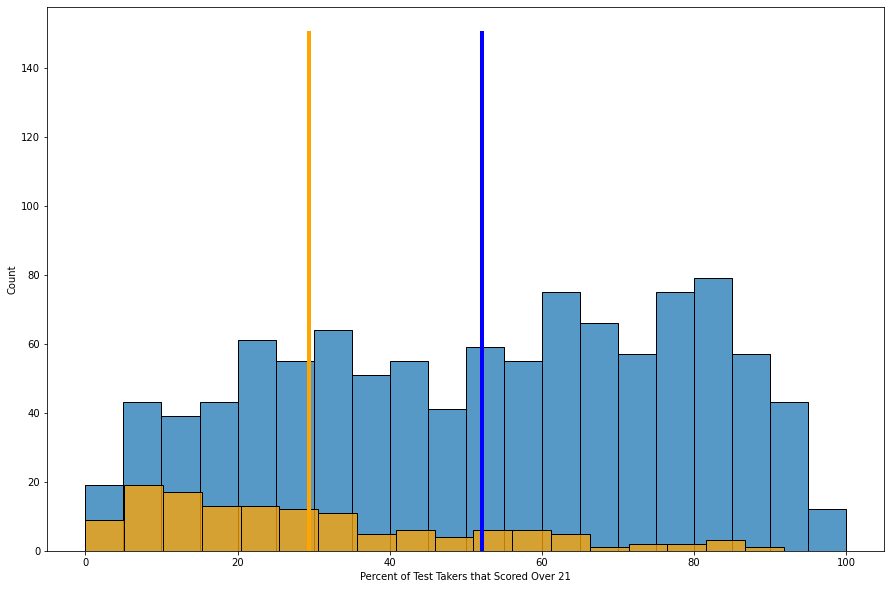

In [15]:
plt.figure(figsize=(15,10))

sns.histplot(final['percent_over_21_score'],
            bins = 20);
sns.histplot(ada_outliers['percent_over_21_score'],
            bins = 18,
            color='orange');
plt.plot([final['percent_over_21_score'].mean(), final['percent_over_21_score'].mean()], [0,150], 
         linewidth=4,
        color='blue');
plt.plot([ada_outliers['percent_over_21_score'].mean(), ada_outliers['percent_over_21_score'].mean()], [0,150], 
         linewidth=4,
        color='orange');

plt.xlabel('Percent of Test Takers that Scored Over 21');

plt.savefig('../figures/test_perf_LAU')
           

These outliers do noticeably worse than average compared to the rest of the schools.

In [16]:
ada_outliers['district'].value_counts()

Los Angeles Unified    135
Name: district, dtype: int64

These outliers all belong to the Los Angeles Unified district and will be excluded in further analysis in order to avoid its effect as an extreme outlier

In [17]:
LAU = final[final['district'] == 'Los Angeles Unified']

In [18]:
final = final[final['district'] != 'Los Angeles Unified']

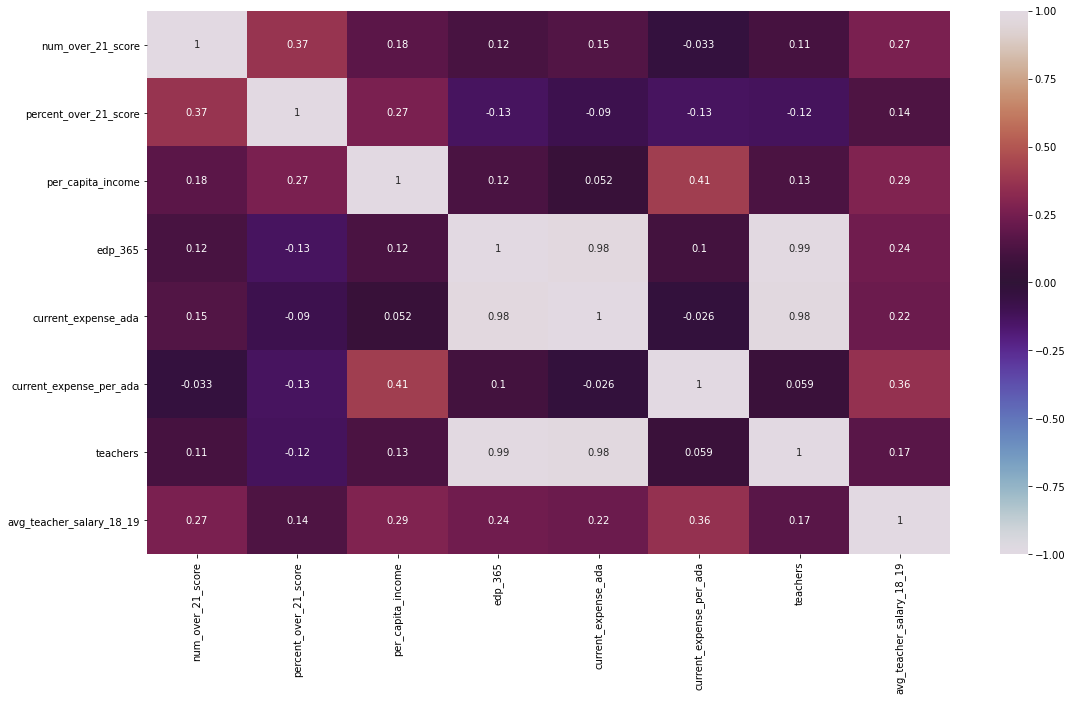

In [19]:
plt.figure(figsize = (18,10))

sns.heatmap(final[['num_over_21_score','percent_over_21_score','per_capita_income','edp_365','current_expense_ada','current_expense_per_ada','teachers','avg_teacher_salary_18_19']].corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    cmap = 'twilight'
       );

plt.savefig('../figures/variable_heatmaps_wo_LAU')
           

Without the LAU schools, some correlation coefficients shift noticeably. Namely, the correlation efficients of edp_365, current_expense_ada and ccurrent_expense_per_ada are markedly lower

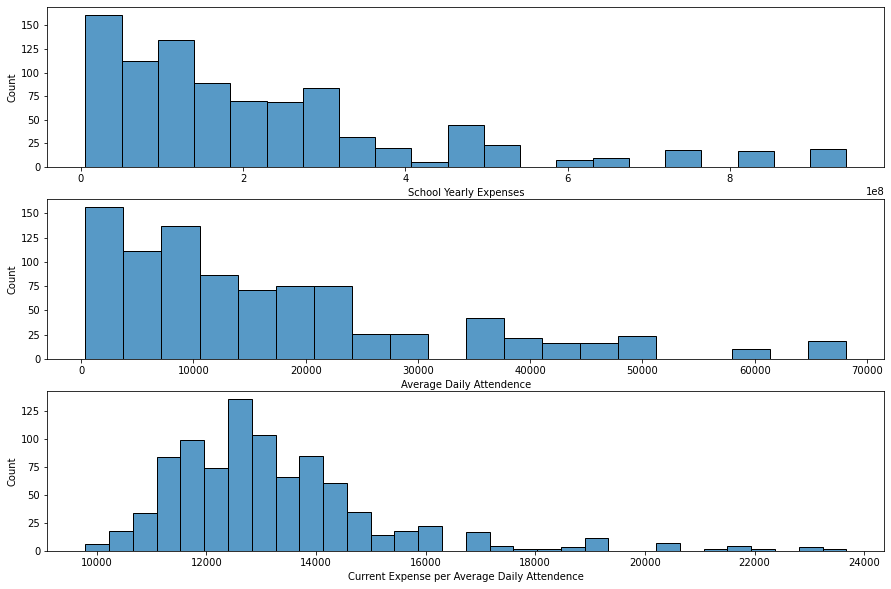

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(x = final['edp_365'])

plt.xlabel('School Yearly Expenses')

plt.subplot(3,1,2)
sns.histplot(x = final['current_expense_ada'])

plt.xlabel('Average Daily Attendence')

plt.subplot(3,1,3)
sns.histplot(x = final['current_expense_per_ada'])

plt.xlabel('Current Expense per Average Daily Attendence')

plt.savefig('../figures/ada_histograms_wo_LAU')
           

Without LAU to act as an extreme, the distributions are hard skewed right with the exception of current expense per ADA being more normally distributed

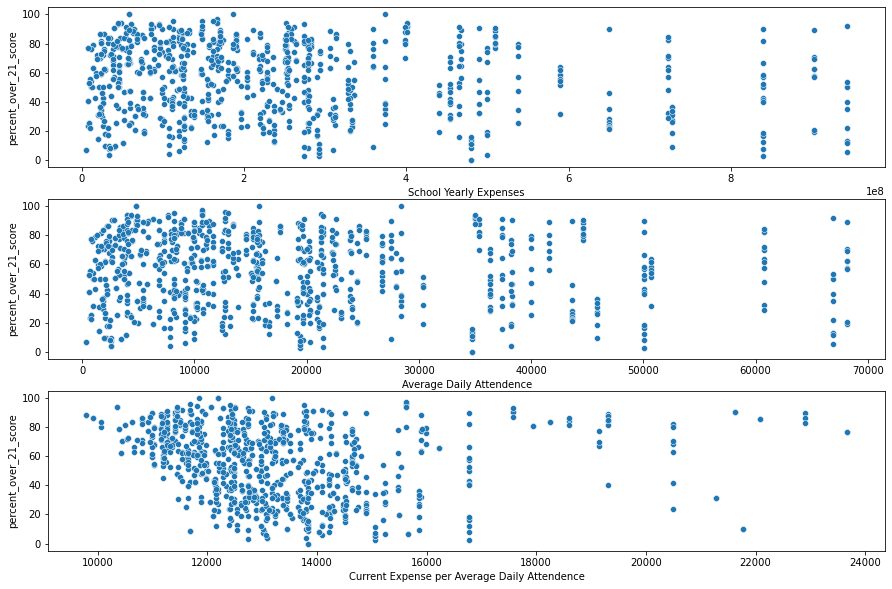

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.scatterplot(x = final['edp_365'],
               y = final['percent_over_21_score'])

plt.xlabel('School Yearly Expenses')

plt.subplot(3,1,2)
sns.scatterplot(x = final['current_expense_ada'],
               y = final['percent_over_21_score'])

plt.xlabel('Average Daily Attendence')

plt.subplot(3,1,3)
sns.scatterplot(x = final['current_expense_per_ada'],
               y = final['percent_over_21_score'])

plt.xlabel('Current Expense per Average Daily Attendence')

plt.savefig('../figures/ada_figs_wo_LAU')
           

With LAU gone there is no significant pattern between the ada statistics and percent_over_21_score

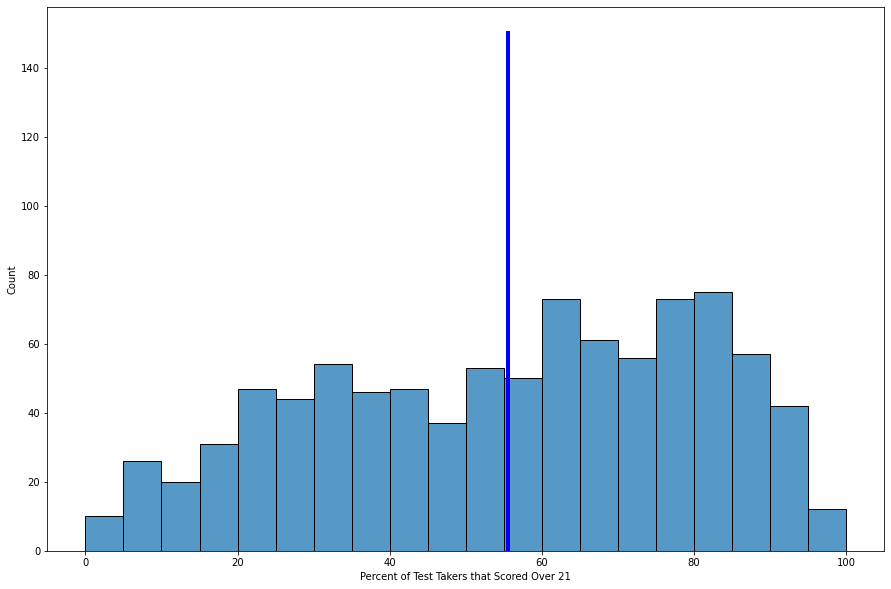

In [23]:
plt.figure(figsize=(15,10))

sns.histplot(final['percent_over_21_score'],
            bins = 20);

plt.plot([final['percent_over_21_score'].mean(), final['percent_over_21_score'].mean()], [0,150], 
         linewidth=4,
        color='blue');

plt.xlabel('Percent of Test Takers that Scored Over 21');

plt.savefig('../figures/percent_over_21_hist_wo_LAU')
           


The mean of the school has also risen to 55.4%

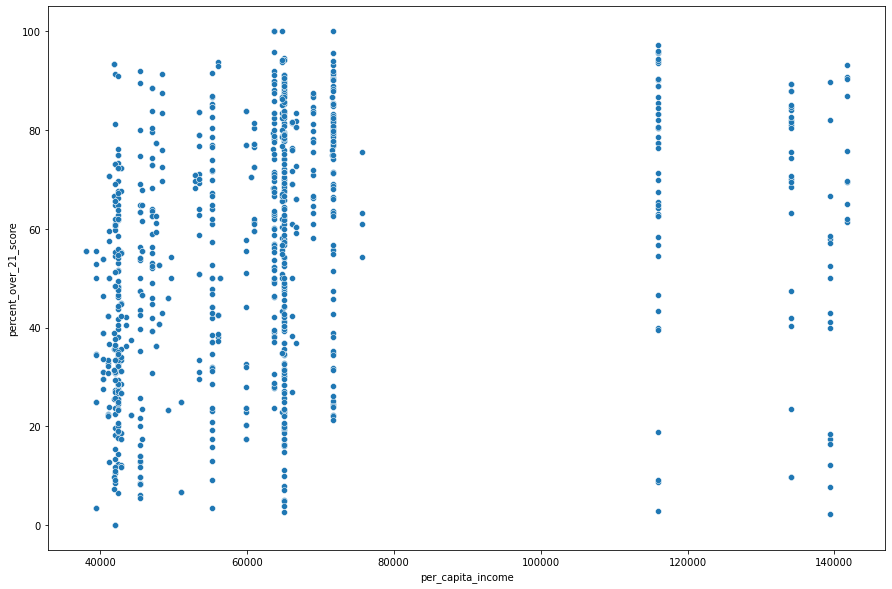

In [21]:
plt.figure(figsize = (15,10));
sns.scatterplot(
    x = final['per_capita_income'],
    y = final['percent_over_21_score']);

plt.savefig('../figures/per_capita_income_scatter_wo_LAU')

There is no strong pattern between per capita income and test performance

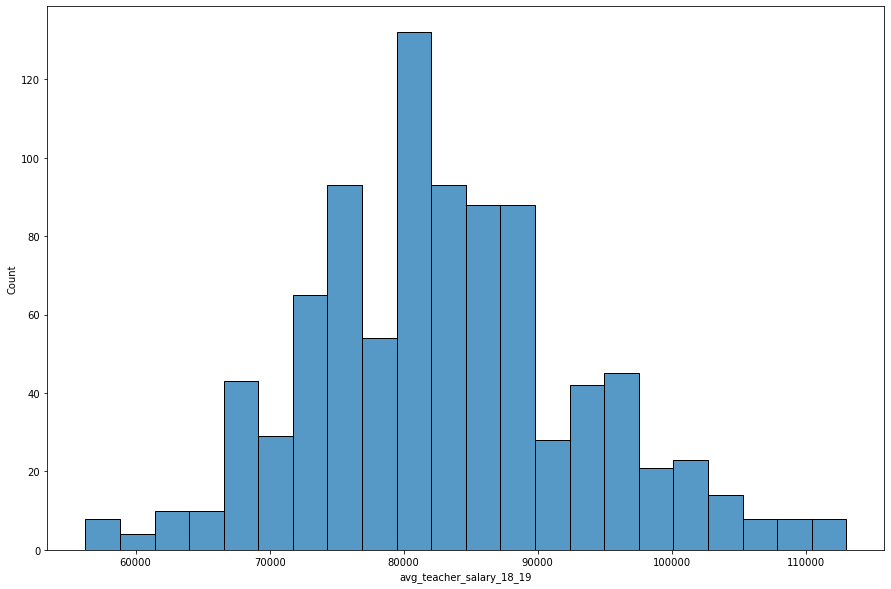

In [110]:
plt.figure(figsize=(15,10))

sns.histplot(final['avg_teacher_salary_18_19']);

plt.savefig('../figures/avg_teacher_salary_wo_LAU')
           

The teacher average salary distribution has not change significantly

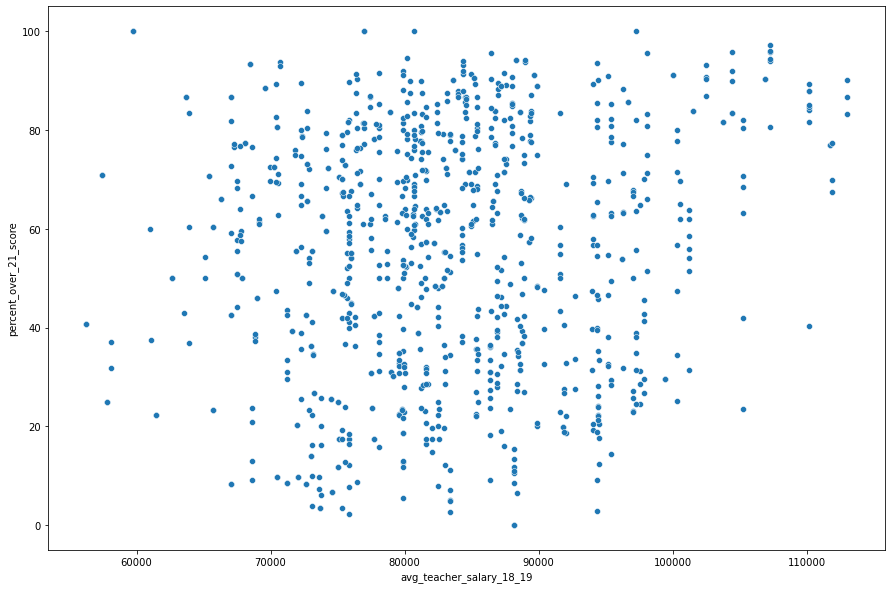

In [111]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=final['avg_teacher_salary_18_19'],
               y=final['percent_over_21_score']);

plt.savefig('../figures/avg_teacher_salary_wo_LAU')
           

Nor is there any strong patterns to be recognized from average teacher salary and test performance

In [112]:
lr = LinearRegression()

In [113]:
X = final[['per_capita_income','edp_365','current_expense_ada','current_expense_per_ada','teachers','avg_teacher_salary_18_19']]
y = final['num_over_21_score']

In [114]:
lr.fit(X,y)

LinearRegression()

In [77]:
list(zip(X.columns,lr.coef_))

[('per_capita_income', 0.0009356123673863436),
 ('edp_365', -6.043102329336874e-07),
 ('current_expense_ada', 0.008623017302016608),
 ('current_expense_per_ada', -0.002845577023088465),
 ('teachers', 0.0016639720013266802),
 ('avg_teacher_salary_18_19', 0.0023954642183545236)]

Running all the factors through a linear regression model, the coefficients show that theres little to no way to explain variations in percent of test takers that score over 21 with county per capita income, school district expenses, or teacher salary.

## Conclusions and Recommendations

At this point in the analysis, with the data we have, we cannot find a relationship between overall ACT test performance and county per capita income, school expense, average daily attendence, teacher count, or average teacher salary.

One point of interest is that the Los Angeles Unified district is a outlier with extremely high test taking rates despite low percent reaching over the ACT 50th percentile.

Going forward, possible points of investigation include.

1. More specific data, including invidual test taker scores, per capita income by school district, teacher salary by school.

2. The unique situation of Los Angeles Unified. Any progress to improve Los Angeles Unified's significantly lower level of performance is amplified by its enourmous ADA

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!